In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from forex_python.converter import CurrencyRates 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 1000) 
pd. set_option('display.max_rows', 1000)

from datetime import datetime
from datetime import timedelta

In [2]:
#reading the dataset
data=pd.read_csv('Payment Date Prediction.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
#dropping a column 
df=df.drop('area_business',axis=1)

In [5]:
df.shape

(50000, 18)

In [6]:
#using fillna method
df['invoice_id'].fillna(df['doc_id'], inplace=True)

In [7]:
#checking the null values
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [8]:
#checking the duplicate 
df_trans = df.T
df_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [9]:
(df['doc_id'] == df['invoice_id']).sum()

50000

In [10]:
#dropping a column
df = df.drop(columns=['doc_id'])  

In [11]:
(df['document_create_date'] == df['document_create_date.1']).sum()

20899

In [12]:
df = df.drop(columns=['document_create_date.1'])  

In [13]:
#checking unique value
df.nunique()

business_code               6
cust_number              1421
name_customer            4207
clear_date                400
buisness_year               2
posting_date              505
document_create_date      507
due_in_date               550
invoice_currency            2
document type               2
posting_id                  1
total_open_amount       44195
baseline_create_date      504
cust_payment_terms         70
invoice_id              48886
isOpen                      2
dtype: int64

In [14]:
df.drop(columns = ['posting_id'],axis=1,inplace=True)

In [15]:
#checking the null value and then separate into train,test
train_df=df[df['clear_date'].notnull()]

In [16]:
test_df=df[df['clear_date'].isnull()]

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         40000 non-null  object 
 1   cust_number           40000 non-null  object 
 2   name_customer         40000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         40000 non-null  float64
 5   posting_date          40000 non-null  object 
 6   document_create_date  40000 non-null  int64  
 7   due_in_date           40000 non-null  float64
 8   invoice_currency      40000 non-null  object 
 9   document type         40000 non-null  object 
 10  total_open_amount     40000 non-null  float64
 11  baseline_create_date  40000 non-null  float64
 12  cust_payment_terms    40000 non-null  object 
 13  invoice_id            40000 non-null  float64
 14  isOpen                40000 non-null  int64  
dtypes: float64(5), int6

In [18]:
#changing to datetime
train_df['clear_date']=pd.to_datetime(train_df['clear_date'])
test_df['clear_date']=pd.to_datetime(test_df['clear_date'])

In [19]:
train_df['posting_date']=pd.to_datetime(train_df['posting_date'])
test_df['posting_date']=pd.to_datetime(test_df['posting_date'])

In [20]:
train_df['document_create_date']=pd.to_datetime(train_df['document_create_date'], format='%Y%m%d')
test_df['document_create_date']=pd.to_datetime(test_df['document_create_date'], format='%Y%m%d')

In [21]:
train_df['due_in_date']=pd.to_datetime(train_df['due_in_date'], format='%Y%m%d')
test_df['due_in_date']=pd.to_datetime(test_df['due_in_date'], format='%Y%m%d')

In [22]:
train_df['baseline_create_date']=pd.to_datetime(train_df['baseline_create_date'], format='%Y%m%d')
test_df['baseline_create_date']=pd.to_datetime(test_df['baseline_create_date'], format='%Y%m%d')

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         40000 non-null  object        
 1   cust_number           40000 non-null  object        
 2   name_customer         40000 non-null  object        
 3   clear_date            40000 non-null  datetime64[ns]
 4   buisness_year         40000 non-null  float64       
 5   posting_date          40000 non-null  datetime64[ns]
 6   document_create_date  40000 non-null  datetime64[ns]
 7   due_in_date           40000 non-null  datetime64[ns]
 8   invoice_currency      40000 non-null  object        
 9   document type         40000 non-null  object        
 10  total_open_amount     40000 non-null  float64       
 11  baseline_create_date  40000 non-null  datetime64[ns]
 12  cust_payment_terms    40000 non-null  object        
 13  invoice_id      

In [24]:
train_df['invoice_id']=train_df['invoice_id'].astype(str)
test_df['invoice_id']=test_df['invoice_id'].astype(str)

In [25]:
train_df['buisness_year']=train_df['buisness_year'].astype(str)
train_df['buisness_year']=train_df['buisness_year'].str[:-2]
test_df['buisness_year']=test_df['buisness_year'].astype(str)
test_df['buisness_year']=test_df['buisness_year'].str[:-2]

In [26]:
train_df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-04-19,2019,2019-04-03,2019-04-03,2019-04-18,USD,RV,55602.94,2019-04-03,NAH4,1929075498.0,0
1,U001,0200124634,BAKEMAR associates,2020-03-11,2020,2020-02-26,2020-02-26,2020-03-07,USD,RV,8345.60,2020-02-26,NA10,1930572616.0,0
2,U001,0200759878,SA us,2019-01-28,2019,2019-01-05,2019-01-04,2019-01-20,USD,RV,13768.73,2019-01-05,NAH4,1928566866.0,0
3,U001,0200769623,WAL-MAR associates,2019-01-25,2019,2019-01-15,2019-01-14,2019-01-30,USD,RV,7463.23,2019-01-15,NAH4,1928619184.0,0
5,U001,0200799367,MCL corp,2019-11-04,2019,2019-10-18,2019-10-17,2019-11-02,USD,RV,18501.55,2019-10-18,NAA8,1930024400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corporation,2019-05-17,2019,2019-05-07,2019-05-06,2019-05-22,USD,RV,6532.60,2019-05-07,NAH4,1929270469.0,0
49996,U001,0200777735,NASH foundation,2020-01-21,2020,2020-01-06,2020-01-06,2020-01-21,USD,RV,84123.80,2020-01-06,NAA8,1930362933.0,0
49997,U001,0200965912,C&S W trust,2019-12-02,2019,2019-11-14,2019-11-14,2019-11-29,USD,RV,22325.58,2019-11-14,NAC6,1930153056.0,0
49998,U001,0200729942,SA corp,2019-10-29,2019,2019-10-14,2019-10-14,2019-10-29,USD,RV,25563.51,2019-10-14,NAA8,1930013127.0,0


In [27]:
#finding the target value
train_df["delay"] = train_df["clear_date"] - train_df["due_in_date"]

In [28]:
#sorting the dataframe using sort function
train_df=train_df.sort_values(by = 'posting_date')

In [29]:
train_df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
380,U001,0200755701,ASSOCI llc,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,18655.77,2018-12-30,NAA8,1928536837.0,0,1 days
8784,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,20467.17,2018-12-30,NAH4,1928541056.0,0,1 days
9879,U001,0200769623,WAL-MAR us,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,4439.84,2018-12-30,NAH4,1928540938.0,0,1 days
15448,U001,0200705372,FR,2019-01-14,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,66586.13,2018-12-30,NAA8,1928537402.0,0,0 days
14959,U001,0200769623,WAL-MAR corporation,2019-01-10,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,8730.88,2018-12-30,NAH4,1928538220.0,0,-4 days


In [30]:
train_df.nunique()

business_code               6
cust_number              1339
name_customer            3912
clear_date                400
buisness_year               2
posting_date              423
document_create_date      426
due_in_date               492
invoice_currency            2
document type               2
total_open_amount       35508
baseline_create_date      428
cust_payment_terms         67
invoice_id              39136
isOpen                      1
delay                     192
dtype: int64

In [31]:
train_df.drop(columns = ['isOpen'],axis=1,inplace=True)
test_df.drop(columns = ['isOpen'],axis=1,inplace=True)

In [32]:
train_df.drop(columns = ['invoice_id'],axis=1,inplace=True)
test_df.drop(columns = ['invoice_id'],axis=1,inplace=True)

In [33]:
train_df.shape,test_df.shape

((40000, 14), (10000, 13))

In [34]:
duplicate_value = train_df.duplicated()

In [35]:
train_df[duplicate_value].shape

(871, 14)

In [36]:
train_df.drop_duplicates(keep='first',inplace=True)

In [37]:
train_df.shape

(39129, 14)

In [38]:
#changing the datatype
train_df['delay'] = train_df['delay'].dt.days

In [39]:
train_df['delay']

380      1
8784     1
9879     1
15448    0
14959   -4
        ..
13758   -3
13125    7
41892    3
37929    0
35156   -1
Name: delay, Length: 39129, dtype: int64

In [40]:
train_df['business_code']=np.where(train_df['business_code'].isin([ 'U005', 'U007']),
                                   'Other Codes',train_df['business_code'])
test_df['business_code']=np.where(test_df['business_code'].isin([ 'U005', 'U007']),
                                   'Other Codes',test_df['business_code'])

# Feature Engineering

In [41]:
business_code_encoder = LabelEncoder()
business_code_encoder1 = LabelEncoder()
business_code_encoder.fit(train_df['business_code'])
business_code_encoder1.fit(test_df['business_code'])
train_df['business_code'] = business_code_encoder.transform(train_df['business_code'])
test_df['business_code'] = business_code_encoder1.transform(test_df['business_code'])

In [42]:
train_df.cust_payment_terms.value_counts()

NAA8    15506
NAH4    10524
CA10     2968
NAC6     1354
NAM4     1033
NAAX      950
NAD1      781
NAG2      744
NAU5      712
NA32      623
NAGD      590
NAX2      575
NAM2      462
NA10      348
NAD5      259
NAVF      227
NAVE      212
NAM1      207
NAAW      164
NAWU      116
NAWN      103
NAVR       83
NAVQ       77
NAWP       60
NAUZ       46
NA3B       42
NAVM       38
CA30       37
NA38       36
NACB       29
NABG       28
NAB1       24
NAD4       18
NA84       14
NAVL       13
C106       13
NAVD       11
NAUP       10
NA9X       10
NA3F        9
NA31        6
NA8Q        6
BR56        5
NA25        5
NATL        4
NATJ        4
BR12        4
NANC        4
B052        3
90M7        3
NATX        3
NAVC        3
NAUW        3
NATW        3
NAUI        2
NATV        2
CAX2        2
NATH        2
CAB1        1
NAV2        1
B112        1
NAUX        1
NAWM        1
NAM3        1
NATZ        1
NACE        1
NAWK        1
Name: cust_payment_terms, dtype: int64

In [43]:
ref = dict(train_df['cust_payment_terms'].value_counts())
ref1 = dict(train_df['cust_payment_terms'].value_counts())
train_df['cust_payment_terms'] = train_df['cust_payment_terms'].map(ref)
test_df['cust_payment_terms'] = test_df['cust_payment_terms'].map(ref)

In [44]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(train_df['cust_number'])
train_df['cust_number'] = cust_number_encoder.transform(train_df['cust_number'])

cust_number_encoder1 = LabelEncoder()
cust_number_encoder1.fit(test_df['cust_number'])
test_df['cust_number'] = cust_number_encoder1.transform(test_df['cust_number'])

In [45]:
ref = dict(train_df['cust_number'].value_counts())
train_df['cust_number'] = train_df['cust_number'].map(ref)
ref1 = dict(test_df['cust_number'].value_counts())
test_df['cust_number'] = test_df['cust_number'].map(ref)

In [46]:
year_encoder = LabelEncoder()
year_encoder.fit(train_df['buisness_year'])
train_df['buisness_year'] = year_encoder.transform(train_df['buisness_year'])
year_encoder1 = LabelEncoder()
year_encoder1.fit(test_df['buisness_year'])
test_df['buisness_year'] = year_encoder1.transform(test_df['buisness_year'])

In [47]:
type_encoder = LabelEncoder()
type_encoder.fit(train_df['document type'])
train_df['document type'] = type_encoder.transform(train_df['document type'])
type_encoder1 = LabelEncoder()
type_encoder1.fit(test_df['document type'])
test_df['document type'] = type_encoder1.transform(test_df['document type'])

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39129 entries, 380 to 35156
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39129 non-null  int32         
 1   cust_number           39129 non-null  int64         
 2   name_customer         39129 non-null  object        
 3   clear_date            39129 non-null  datetime64[ns]
 4   buisness_year         39129 non-null  int32         
 5   posting_date          39129 non-null  datetime64[ns]
 6   document_create_date  39129 non-null  datetime64[ns]
 7   due_in_date           39129 non-null  datetime64[ns]
 8   invoice_currency      39129 non-null  object        
 9   document type         39129 non-null  int32         
 10  total_open_amount     39129 non-null  float64       
 11  baseline_create_date  39129 non-null  datetime64[ns]
 12  cust_payment_terms    39129 non-null  int64         
 13  delay         

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49994
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  int32         
 1   cust_number           10000 non-null  int64         
 2   name_customer         10000 non-null  object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         10000 non-null  int32         
 5   posting_date          10000 non-null  datetime64[ns]
 6   document_create_date  10000 non-null  datetime64[ns]
 7   due_in_date           10000 non-null  datetime64[ns]
 8   invoice_currency      10000 non-null  object        
 9   document type         10000 non-null  int32         
 10  total_open_amount     10000 non-null  float64       
 11  baseline_create_date  10000 non-null  datetime64[ns]
 12  cust_payment_terms    9992 non-null   float64       
dtypes: datetime64[ns

In [50]:
c = CurrencyRates()
train_df.loc[(train_df.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')
train_df.replace(to_replace ="CAD", value ="USD",inplace=True)
test_df.loc[(test_df.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')
test_df.replace(to_replace ="CAD", value ="USD",inplace=True)

In [51]:
train_df.nunique()

business_code               5
cust_number               136
name_customer            3912
clear_date                400
buisness_year               2
posting_date              423
document_create_date      426
due_in_date               492
invoice_currency            1
document type               2
total_open_amount       35535
baseline_create_date      428
cust_payment_terms         44
delay                     192
dtype: int64

In [52]:
train_df=train_df.drop(columns='invoice_currency',axis=1)
test_df=test_df.drop(columns='invoice_currency',axis=1)

In [53]:
train_df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
380,2,16,ASSOCI llc,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,18655.77,2018-12-30,15506,1
8784,2,8869,WAL-MAR llc,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,20467.17,2018-12-30,10524,1
9879,2,8869,WAL-MAR us,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,4439.84,2018-12-30,10524,1
15448,2,117,FR,2019-01-14,0,2018-12-30,2018-12-29,2019-01-14,0,66586.13,2018-12-30,15506,0
14959,2,8869,WAL-MAR corporation,2019-01-10,0,2018-12-30,2018-12-29,2019-01-14,0,8730.88,2018-12-30,10524,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13758,2,8869,WAL-MAR corporation,2020-03-09,1,2020-02-26,2020-02-24,2020-03-12,0,16697.15,2020-02-26,10524,-3
13125,2,14,ESSEX us,2020-03-19,1,2020-02-26,2020-02-22,2020-03-12,0,36435.85,2020-02-26,15506,7
41892,2,56,BARGAIN corp,2020-03-16,1,2020-02-27,2020-02-27,2020-03-13,0,3599.97,2020-02-27,15506,3
37929,2,1053,SA associates,2020-03-13,1,2020-02-27,2020-02-26,2020-03-13,0,3396.48,2020-02-27,10524,0


In [54]:
train_df['document_create_date_day'] = train_df['document_create_date'].dt.day
train_df['document_create_date_month'] = train_df['document_create_date'].dt.month
train_df['document_create_date_year'] = train_df['document_create_date'].dt.year
train_df['document_create_date_quarter']= train_df['document_create_date'].dt.quarter

test_df['document_create_date_day'] = test_df['document_create_date'].dt.day
test_df['document_create_date_month'] = test_df['document_create_date'].dt.month
test_df['document_create_date_year'] = test_df['document_create_date'].dt.year
test_df['document_create_date_quarter']= test_df['document_create_date'].dt.quarter

In [55]:
#checking corr of the dataset
corr = train_df.corr()
corr

,business_code,cust_number,buisness_year,document type,total_open_amount,cust_payment_terms,delay,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter
business_code,1.000000,0.122192,0.005754,-0.031919,-0.124932,0.203191,-0.085712,-0.003145,-0.012531,0.003622,-0.011532
cust_number,0.122192,1.000000,0.008760,-0.005895,-0.138178,0.089729,-0.156070,0.011608,0.029907,0.003059,0.024496
buisness_year,0.005754,0.008760,1.000000,-0.003887,-0.005302,-0.008787,-0.017511,0.002093,-0.408394,0.945075,-0.380736
document type,-0.031919,-0.005895,-0.003887,1.000000,-0.002538,-0.010543,0.190442,0.015484,-0.007979,-0.003483,-0.011482
total_open_amount,-0.124932,-0.138178,-0.005302,-0.002538,1.000000,0.073161,-0.001663,0.020039,0.027249,-0.003258,0.028168
cust_payment_terms,0.203191,0.089729,-0.008787,-0.010543,0.073161,1.000000,-0.073072,0.005026,0.012052,-0.012472,0.014084
delay,-0.085712,-0.156070,-0.017511,0.190442,-0.001663,-0.073072,1.000000,-0.006862,-0.023345,-0.019737,-0.020246
document_create_date_day,-0.003145,0.011608,0.002093,0.015484,0.020039,0.005026,-0.006862,1.000000,-0.003974,-0.058194,0.001304
document_create_date_month,-0.012531,0.029907,-0.408394,-0.007979,0.027249,0.012052,-0.023345,-0.003974,1.000000,-0.472078,0.973643
document_create_date_year,0.003622,0.003059,0.945075,-0.003483,-0.003258,-0.012472,-0.019737,-0.058194,-0.472078,1.000000,-0.434876


<AxesSubplot:>

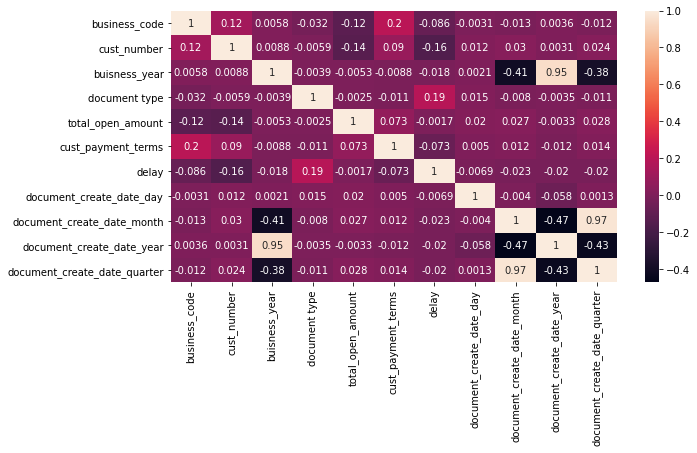

In [56]:
#heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [57]:
#saving the data as train.csv
train_df.to_csv('train.csv')

In [58]:
#saving the data as test.csv
test_df.to_csv('test.csv')

In [59]:
#making a copy
X = train_df.drop(columns = ['delay']).copy()

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49994
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 10000 non-null  int32         
 1   cust_number                   10000 non-null  int64         
 2   name_customer                 10000 non-null  object        
 3   clear_date                    0 non-null      datetime64[ns]
 4   buisness_year                 10000 non-null  int32         
 5   posting_date                  10000 non-null  datetime64[ns]
 6   document_create_date          10000 non-null  datetime64[ns]
 7   due_in_date                   10000 non-null  datetime64[ns]
 8   document type                 10000 non-null  int32         
 9   total_open_amount             10000 non-null  float64       
 10  baseline_create_date          10000 non-null  datetime64[ns]
 11  cust_payment_terms          

In [61]:
y = train_df['delay']

In [62]:
X_train, X_inter_test, y_train, y_inter_test = train_test_split(X, y, test_size=0.23, random_state=0, shuffle=False)

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_inter_test,y_inter_test, test_size=0.5,random_state=0,shuffle=False)

In [64]:
X_train.shape , X_val.shape , X_test.shape

((30129, 16), (4500, 16), (4500, 16))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

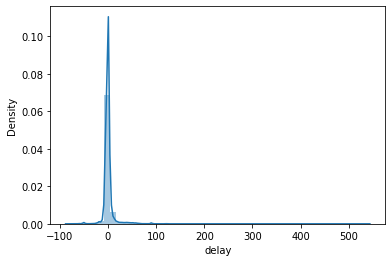

In [65]:
sns.distplot(y_train)

In [66]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,delay
0,380,2,16,ASSOCI llc,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,18655.77,2018-12-30,15506,29,12,2018,4,1
1,8784,2,8869,WAL-MAR llc,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,20467.17,2018-12-30,10524,29,12,2018,4,1
2,9879,2,8869,WAL-MAR us,2019-01-15,0,2018-12-30,2018-12-29,2019-01-14,0,4439.84,2018-12-30,10524,29,12,2018,4,1
3,15448,2,117,FR,2019-01-14,0,2018-12-30,2018-12-29,2019-01-14,0,66586.13,2018-12-30,15506,29,12,2018,4,0
4,14959,2,8869,WAL-MAR corporation,2019-01-10,0,2018-12-30,2018-12-29,2019-01-14,0,8730.88,2018-12-30,10524,29,12,2018,4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30124,8417,2,8869,WAL-MAR foundation,2019-11-18,0,2019-11-05,2019-11-03,2019-11-20,0,3853.70,2019-11-05,10524,3,11,2019,4,-2
30125,17104,2,8869,WAL-MAR systems,2019-11-21,0,2019-11-05,2019-11-05,2019-11-20,0,18576.20,2019-11-05,10524,5,11,2019,4,1
30126,42854,2,259,DEC us,2019-11-08,0,2019-11-05,2019-11-05,2019-11-11,0,5620.16,2019-11-01,462,5,11,2019,4,-3
30127,39152,2,79,ALBERT associates,2019-11-20,0,2019-11-05,2019-11-05,2019-11-20,0,59495.70,2019-11-05,15506,5,11,2019,4,0


<AxesSubplot:xlabel='delay', ylabel='posting_date'>

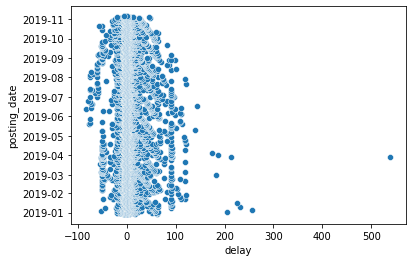

In [67]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date")

In [68]:
X_train.drop(columns = ['name_customer'],axis=1,inplace=True)

In [69]:
X_val.drop(columns = ['name_customer'],axis=1,inplace=True)

In [70]:
X_test.drop(columns = ['name_customer'],axis=1,inplace=True)

In [71]:
test_df.drop(columns = ['name_customer'],axis=1,inplace=True)

<AxesSubplot:xlabel='cust_payment_terms', ylabel='Density'>

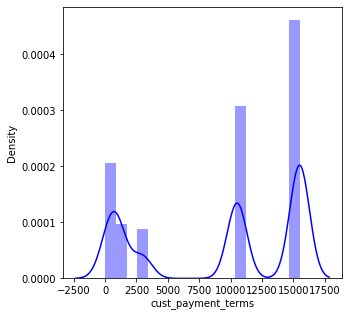

In [72]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(X_train['cust_payment_terms'],color='blue')

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

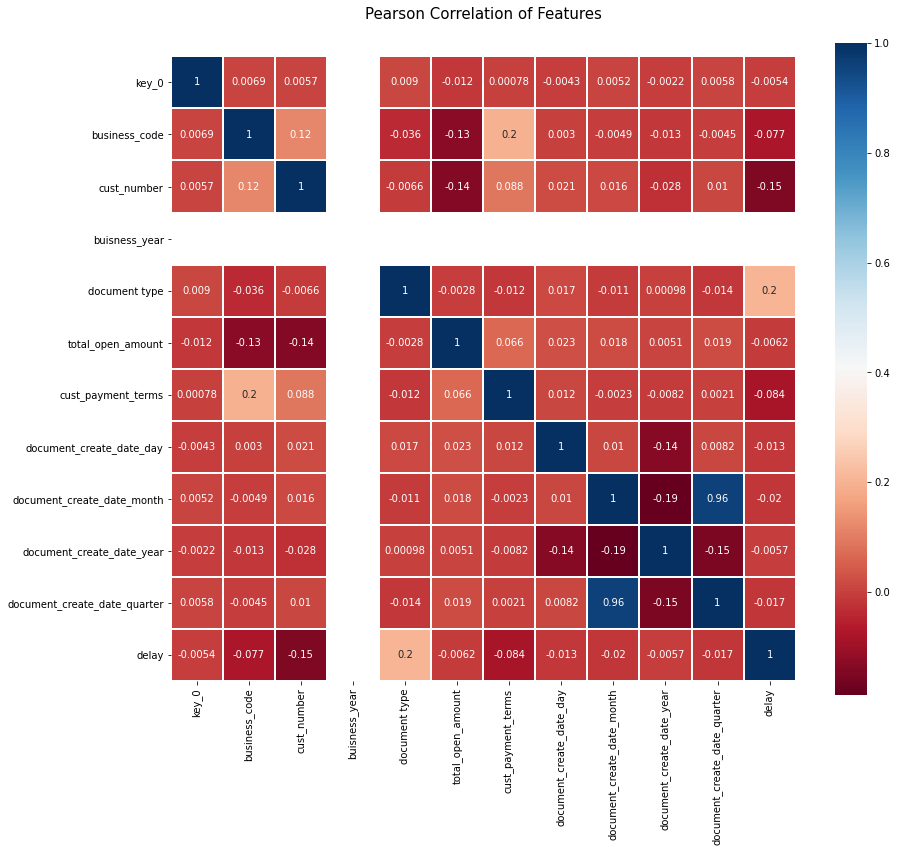

In [73]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30129 entries, 380 to 6572
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 30129 non-null  int32         
 1   cust_number                   30129 non-null  int64         
 2   clear_date                    30129 non-null  datetime64[ns]
 3   buisness_year                 30129 non-null  int32         
 4   posting_date                  30129 non-null  datetime64[ns]
 5   document_create_date          30129 non-null  datetime64[ns]
 6   due_in_date                   30129 non-null  datetime64[ns]
 7   document type                 30129 non-null  int32         
 8   total_open_amount             30129 non-null  float64       
 9   baseline_create_date          30129 non-null  datetime64[ns]
 10  cust_payment_terms            30129 non-null  int64         
 11  document_create_date_day   

In [75]:
X_train=X_train.drop(columns=['document type','buisness_year','clear_date','posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [76]:
X_test=X_test.drop(columns=['document type','buisness_year','clear_date','posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [77]:
X_val=X_val.drop(columns=['document type','buisness_year','clear_date','posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [78]:
final_test_df=test_df.drop(columns=['document type','buisness_year','clear_date','posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [79]:
X_train.nunique()

business_code                       5
cust_number                       136
total_open_amount               27481
cust_payment_terms                 44
document_create_date_day           31
document_create_date_month         12
document_create_date_year           2
document_create_date_quarter        4
dtype: int64

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_predict = base_model.predict(X_val)
y_predict

array([ 1.24752935,  1.17907518,  2.95884672, ...,  0.0349747 ,
       -0.80888312, -0.2016816 ])

In [82]:
y_predict = y_predict.astype(int)
y_predict

array([1, 1, 2, ..., 0, 0, 0])

In [83]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.097504043094646

# Decision tree regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [85]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [86]:
y_predict2 = regressor.predict(X_val)
y_predict2

array([0.80673434, 0.80673434, 0.80673434, ..., 0.80673434, 0.80673434,
       0.80673434])

In [87]:
y_predict2 = y_predict2.astype(int)
y_predict2

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
mse=mean_squared_error(y_val, y_predict2, squared=False)
mse

4.717508758750628

In [89]:
import math

rmse = math. sqrt(mse)
print(rmse)

2.1719826792013395


In [90]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.705982814475331

# Accuracy Checker

In [91]:
from sklearn.ensemble import RandomForestRegressor

import random
random_model = RandomForestRegressor(n_estimators=500)

random_model.fit(X_train, y_train)

y_pred2 = random_model.predict(X_test).astype(int)
#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy,2),'%')

91.6 %


In [92]:
final_test_df

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter
4,2,1,95651.82,15506.0,11,4,2020,2
13,2,10,12446.28,462.0,7,3,2020,1
22,2,5,11889.49,15506.0,6,4,2020,2
29,2,1,20691.83,10524.0,21,3,2020,1
45,2,1,8058.89,590.0,31,3,2020,1
...,...,...,...,...,...,...,...,...
49982,2,5,132.72,15506.0,27,4,2020,2
49985,2,1,53216.50,10524.0,22,3,2020,1
49987,2,1,1322.22,10524.0,18,3,2020,1
49988,2,1,73209.62,15506.0,3,3,2020,1


In [93]:
null = final_test_df.isnull().sum().to_frame(name = 'Null_Count')
null = null[null['Null_Count']>0]
null_features = null.index
null

,Null_Count
cust_payment_terms,8


In [94]:
final_test_df=final_test_df.dropna()

In [95]:
#predict delay for final test data
final_test_df['delay']=random_model.predict(final_test_df).astype(int)

In [96]:
final_test_df

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,delay
4,2,1,95651.82,15506.0,11,4,2020,2,-1
13,2,10,12446.28,462.0,7,3,2020,1,3
22,2,5,11889.49,15506.0,6,4,2020,2,1
29,2,1,20691.83,10524.0,21,3,2020,1,0
45,2,1,8058.89,590.0,31,3,2020,1,-27
...,...,...,...,...,...,...,...,...,...
49982,2,5,132.72,15506.0,27,4,2020,2,5
49985,2,1,53216.50,10524.0,22,3,2020,1,0
49987,2,1,1322.22,10524.0,18,3,2020,1,0
49988,2,1,73209.62,15506.0,3,3,2020,1,-2


In [97]:
#creating payment Date Prediction
final_test_df['Payment date prediction']=test_df['due_in_date']+pd.to_timedelta(final_test_df['delay'],unit='d')

In [98]:
final_test_df

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,delay,Payment date prediction
4,2,1,95651.82,15506.0,11,4,2020,2,-1,2020-04-27
13,2,10,12446.28,462.0,7,3,2020,1,3,2020-03-14
22,2,5,11889.49,15506.0,6,4,2020,2,1,2020-04-22
29,2,1,20691.83,10524.0,21,3,2020,1,0,2020-04-06
45,2,1,8058.89,590.0,31,3,2020,1,-27,2020-05-09
...,...,...,...,...,...,...,...,...,...,...
49982,2,5,132.72,15506.0,27,4,2020,2,5,2020-05-16
49985,2,1,53216.50,10524.0,22,3,2020,1,0,2020-04-07
49987,2,1,1322.22,10524.0,18,3,2020,1,0,2020-04-03
49988,2,1,73209.62,15506.0,3,3,2020,1,-2,2020-03-16


# Bucketisation

In [99]:
aging_bucket = []
for x in final_test_df['delay']:
    if x<=0:
        aging_bucket.append("0 days")
        
    elif x<=15:
        aging_bucket.append("1-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
final_test_df['Aging_Bucket']=aging_bucket

In [100]:
final_test_df

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,delay,Payment date prediction,Aging_Bucket
4,2,1,95651.82,15506.0,11,4,2020,2,-1,2020-04-27,0 days
13,2,10,12446.28,462.0,7,3,2020,1,3,2020-03-14,1-15days
22,2,5,11889.49,15506.0,6,4,2020,2,1,2020-04-22,1-15days
29,2,1,20691.83,10524.0,21,3,2020,1,0,2020-04-06,0 days
45,2,1,8058.89,590.0,31,3,2020,1,-27,2020-05-09,0 days
...,...,...,...,...,...,...,...,...,...,...,...
49982,2,5,132.72,15506.0,27,4,2020,2,5,2020-05-16,1-15days
49985,2,1,53216.50,10524.0,22,3,2020,1,0,2020-04-07,0 days
49987,2,1,1322.22,10524.0,18,3,2020,1,0,2020-04-03,0 days
49988,2,1,73209.62,15506.0,3,3,2020,1,-2,2020-03-16,0 days


In [101]:
#counting the values 
final_test_df.Aging_Bucket.value_counts()

0 days                  5795
1-15days                3944
16-30days                147
Greater than 60 days      79
46-60days                 15
31-45days                 12
Name: Aging_Bucket, dtype: int64

# All Completed